**Introduction**
In this project, I will analyze the COVID-19 pandemic using data on cases, deaths, and recoveries. The goal of this analysis is to understand how the pandemic spread over time in different countries and regions. Additionally, I will apply machine learning techniques to predict future outcomes, such as the increase in cases or deaths, based on historical data.

**Goals**
Understand how COVID-19 spread over time in different countries and regions.
Analyze the cumulative number of confirmed cases, deaths, and recoveries.
Visualize data to identify patterns in the distribution of cases, recoveries, and deaths.
Apply machine learning models to predict outcomes such as the increase in cases or deaths in the future.

Data Used
I will use data with the following features:
Lat (Latitude): To determine geographical locations north or south.
Long (Longitude): To determine geographical locations east or west.
Date: The date of the daily report.
Confirmed: The cumulative number of confirmed cases up to this day.
Deaths: The cumulative number of deaths up to this day.
Recovered: The cumulative number of recovered cases up to this day.

Steps
Import libraries and data.
Clean and prepare the data for analysis.
Explore and visualize general patterns.
Train machine learning models to predict and analyze complex patterns.

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [31]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates=['Date'])

In [32]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [33]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [34]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

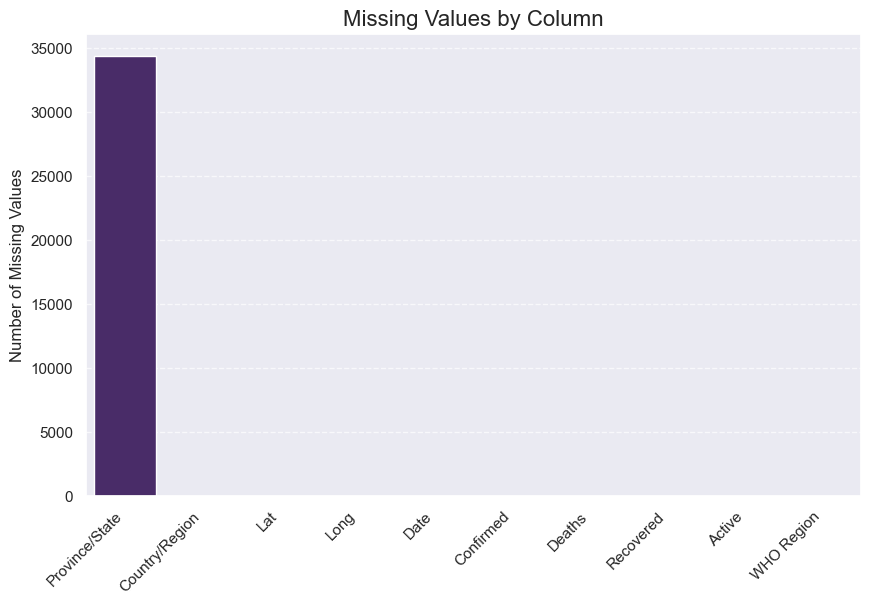

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [35]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values in each column
missing_values = df.isnull().sum()

# Plot missing values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values by Column", fontsize=16)
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display missing values summary
missing_values


In [36]:
df['Province/State'].fillna('Unknown', inplace=True)

In [37]:
# Active Case = confirmed - deaths - recovered
df['Active'] = df['Confirmed'] - df[ 'Deaths'] - df['Recovered']

In [38]:
from datetime import datetime as dt

df['Date'] = df['Date'].dt.normalize()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [40]:
total_cases = df.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


Text(0.5, 1.0, 'Worldwide Confirmed Cases Over Time')

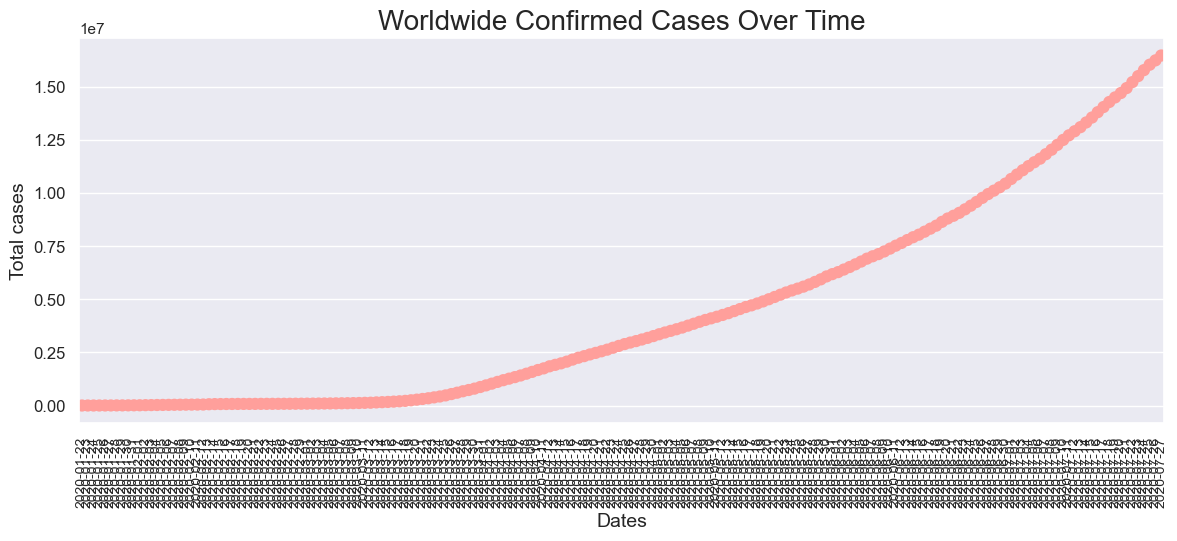

In [41]:
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)

In [42]:
top = df.loc[df['Date'] == df['Date'].max()]

In [43]:
top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()

top_casualities

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


Text(0.5, 1.0, 'Top 10 countries having most confirmed cases')

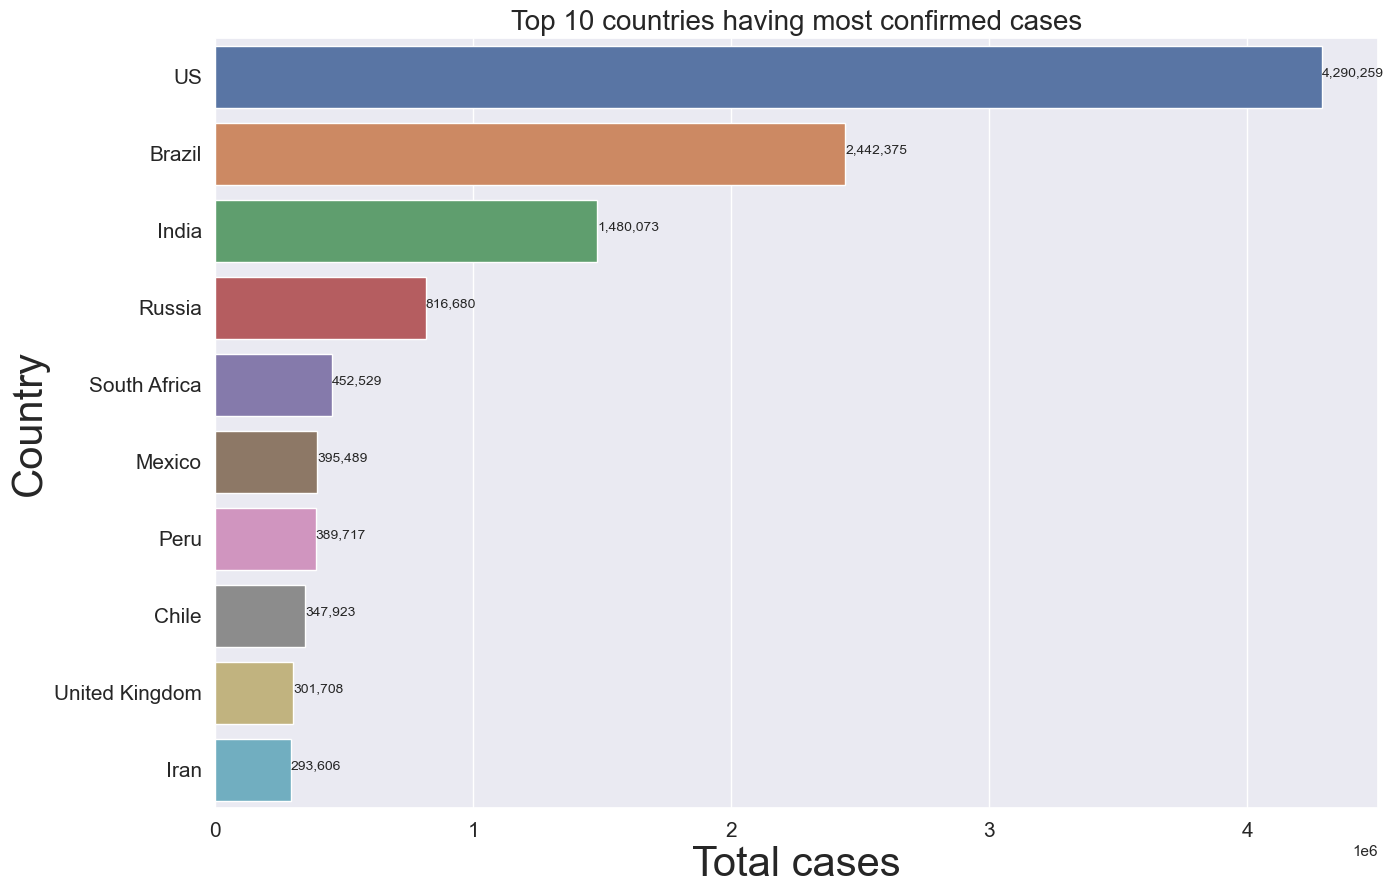

In [ ]:

plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)

Text(0.5, 1.0, "Brazil's Active Cases Over Time")

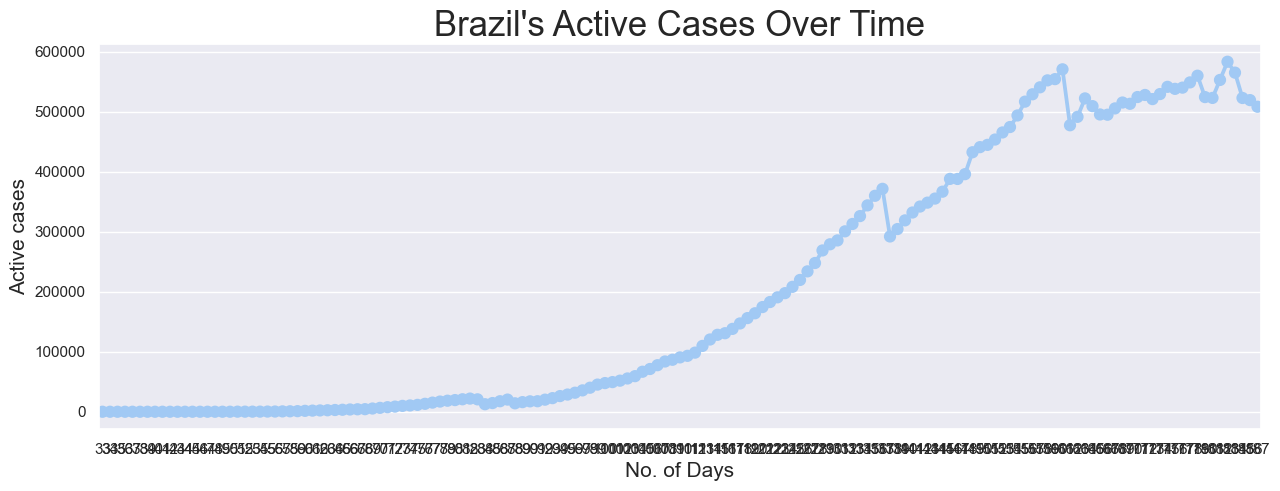

In [47]:
plt.figure(figsize=(15,5))
sns.set_color_codes("pastel")


sns.pointplot(x=brazil_data.index, y=brazil_data['Active'], color='b')

plt.xlabel('No. of Days', fontsize=15)
plt.ylabel('Active cases', fontsize=15)
plt.title("Brazil's Active Cases Over Time", fontsize=25)

Mean Squared Error (MSE): 18838245490.75016


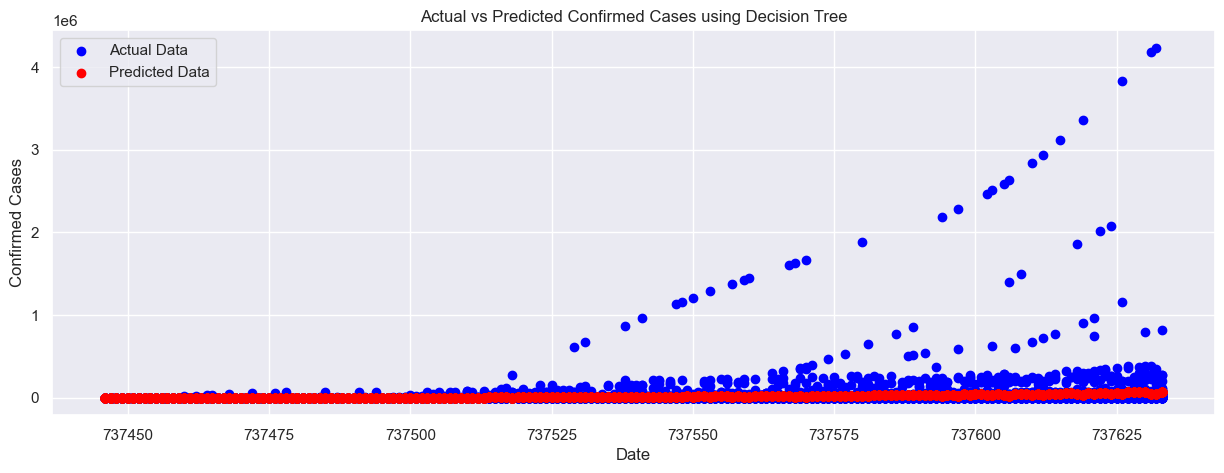

In [48]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is already your dataset and you have 'Date' and 'Confirmed' columns

# Prepare data (convert date to numerical format)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = df[['Date']]  # Feature: Date
y = df['Confirmed']  # Target: Confirmed cases

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.show()



Mean Squared Error (MSE): 17220206248.279152


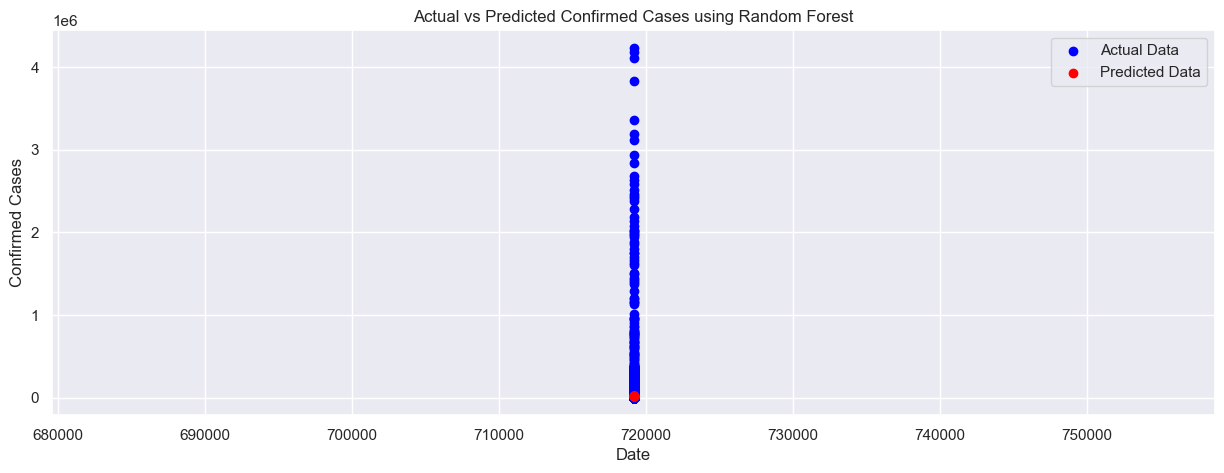

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt


# Prepare data (convert date to numerical format)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = df[['Date']]  
y = df['Confirmed'] 

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Random Forest')
plt.legend()
plt.show()


In [50]:
df['Day'] = (df['Date'] - df['Date'].min())
X = df[['Day']]
y = df['Confirmed']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test set
predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, r2_score ,mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'mse: {mse}')

Mean Absolute Error: 28718.174383950096
mse: 19027548181.53383
